#### Tips of using this notebook:

- Try to solve the problem yourself first with the help of ChatGPT.
- Then check the reference code and the example prompt. The example prompt will be given in the slides.
- Always check the reliability of the generated answers and be responsible for them.

# Exercise 1: K-Means

Write a Python script to Use K-Means to cluster the given dataset generated by the code.
```
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  
```
Requirements:
- Use different numbers of clusters.
- Visualize each clustering result.
- Choose the optimal number of clusters. (Elbow method or Silhouette score)

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

Optimal number of clusters: 2


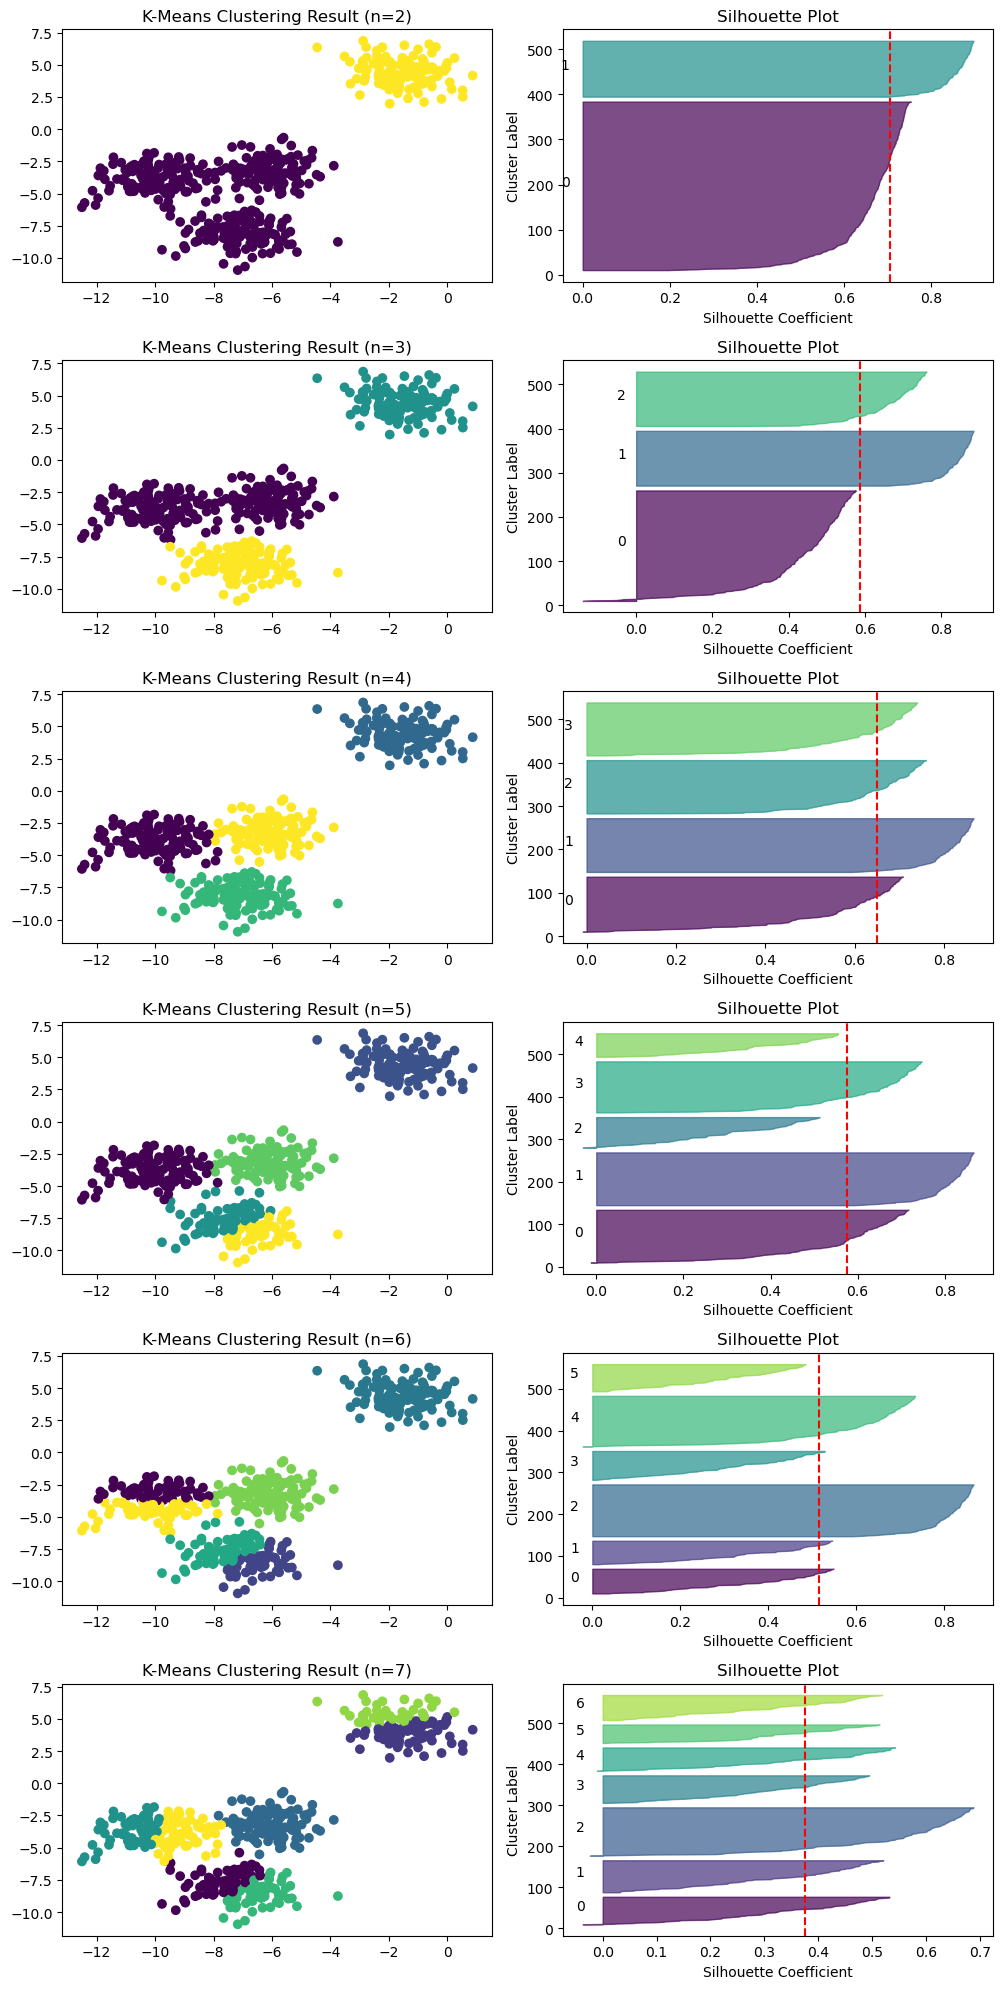

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate the dataset
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

# Try different numbers of clusters
n_clusters_list = range(2, 8)
silhouette_scores = []
clusterings = []

# Perform K-Means clustering for each number of clusters
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clustering = kmeans.fit_predict(X)
    clusterings.append(clustering)
    silhouette_avg = silhouette_score(X, clustering)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = n_clusters_list[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_n_clusters)

# Visualize the clustering results
fig, axes = plt.subplots(len(n_clusters_list), 2, figsize=(10, 20))
                        
for i, clustering in enumerate(clusterings):
    n_clusters = n_clusters_list[i]
    silhouette_avg = silhouette_scores[i]
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    
    # Plot data points with color-coded clusters
    ax1.scatter(X[:, 0], X[:, 1], c=clustering, cmap='viridis')
    ax1.set_title(f'K-Means Clustering Result (n={n_clusters})')
    
    # Plot silhouette plot
    sample_silhouette_values = silhouette_samples(X, clustering)
    y_lower = 10
    
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clustering == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        color = plt.cm.viridis(j / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10
    
    ax2.set_title("Silhouette Plot")
    ax2.set_xlabel("Silhouette Coefficient")
    ax2.set_ylabel("Cluster Label")
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.tight_layout()
plt.show()

# Exercise 2: Hierarchical Clustering

- Dataset: the iris dataset
    - 4 attributes and 150 samples. Each sample is labeled as one of the three types of Iris flowers.
- Tasks: 
    1. Conduct hierarchical clustering on the Iris dataset. Ignore the labels and just use the attributes to cluster the dataset.
    2. Try different linkage criterions for the hierarchical clustering.
    3. Compare the results of different linkage criterions with the original labels to see which one performs better in this scenario.
    4. isualize the resulting cluster hierarchies.

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

ARI score with ward linkage: 0.7311985567707746
ARI score with complete linkage: 0.6422512518362898
ARI score with average linkage: 0.7591987071071522
Best linkage criterion: average


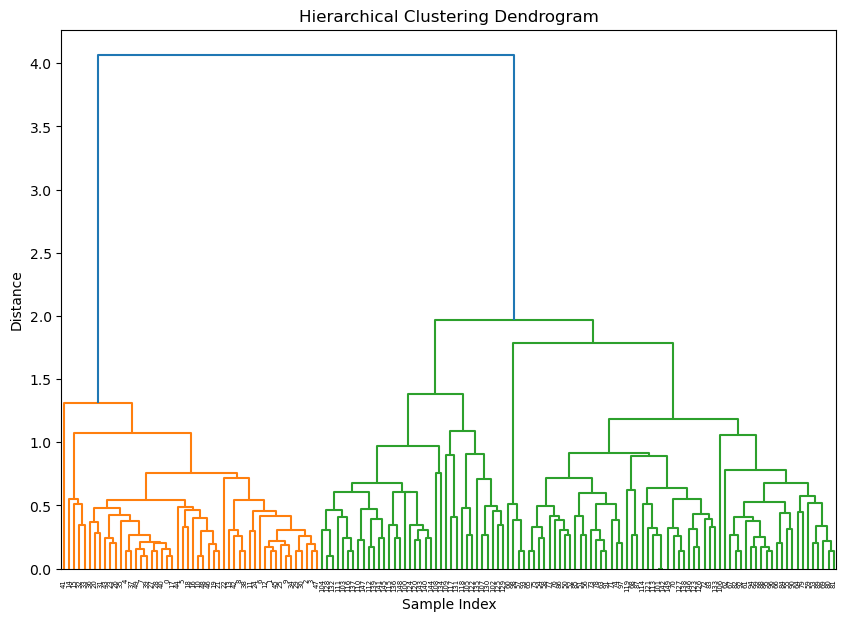

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data

# Step 2: Cluster the dataset into three clusters using different linkage criterions
linkage_criterions = ['ward', 'complete', 'average']
best_linkage_criterion = None
best_ari_score = -1

for criterion in linkage_criterions:
    model = AgglomerativeClustering(n_clusters=3, linkage=criterion)
    clusters = model.fit_predict(X)
    ari_score = adjusted_rand_score(data.target, clusters)
    
    print(f"ARI score with {criterion} linkage: {ari_score}")
    
    if ari_score > best_ari_score:
        best_ari_score = ari_score
        best_linkage_criterion = criterion

# Step 3: Compare the clustering results with the original labels using adjusted Rand score
print(f"Best linkage criterion: {best_linkage_criterion}")

# Step 4: Visualize the resulting clustering hierarchy with the best linkage criterion
Z = linkage(X, method=best_linkage_criterion)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

## Template for Assignment 4

```

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X

X_public = read_data_from_csv('assignment_4_public.csv')
print('Shape of X_public:', X_public.shape)

# remove and make your own predictions.
preds = np.full(len(X_public), -1,
                dtype=int)

'''
CODE HERE!
'''

submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_4.csv', index=True, index_label='Id')
```